## 4. Exploratory Data Analysis 
+ 탐색적 데이터 분석이란?

### 학습 순서
__1. 단변량 데이터 탐색__  
__2. 이상치 처리__  
__3. 변수변환__  
__4. 결측치 처리__  
__5. 다변량 데이터 탐색__  



### 4.1. 단변량 데이터 검색(Exploring Univariate Data)
4.1.1 먼저 데이터 세트의 특성과 구조를 파악해 봅시다.  
+  __데이터세트명__<font color=#D9116E>.__함수명()__ </font>
+ <font color=#D9116E>.__info()__ </font> : 기본 정보 반환(튜플 수, 컬럼 수, (컬럼명, 값이있는튜플의개수, 자료형), 메모리 사용량)
+ <font color=#D9116E>.__head()__ </font> : 상위 5개 반환
+ <font color=#D9116E>.__tail()__ </font> : 하위 5개 반환
+ .index : 데이터프레임에서 index 구성요소 확인
+ .dtypes : 데이터프레임에서 각 열의 데이터 유형이 있는 Series를 확인
+ ['컬럼명'].dtype : 컬럼명의 데이터 유형을 확인
+ .columns : 데이터프레임의 컬럼의 구성요소 확인
+ .values : 데이터프레임에서 values의 구성요소 확인
+ .shape : 데이터프레임의 행과 열의 수를 튜플 구조로 확인
+ .index.values : index의 값을 ndarray 구조로 확인
+ .columns.values : columns의 값을 ndarray 구조로 확인
  
   
     
4.1.2 하나의 변수를 탐색합니다.
+ __범주형(categorical variable)__ 자료 탐색   
    + __데이터세트명['변수']__<font color=#D9116E>.__함수명()__ </font>
    + <font color=#D9116E>.__value_counts()__ </font> : 범주별 빈도 반환
    + <font color=#D9116E>.__replace([범주명1,...], [변경할범주명1, ...])__ </font> : 범주명 변환
+ __수치형(numeric/continuous variable)__ 자료 탐색
    +  __데이터세트명__<font color=#D9116E>.__함수명()__ </font>
    + <font color=#D9116E>.__describe()__ </font> : 기술통계량(count,mean,std,min,25%,50%,75%,max) 확인
    + <font color=#D9116E>.__skew()__</font> : 왜도(skewness) 확인  
    + <font color=#D9116E>.__kurtosis()__</font> : 첨도(kurtosis) 확인 

#### 1. 데이터를 불러 옵니다.  
Ex_CEOSalary.csv: 쉼표로 구분된 한글 csv 파일

In [45]:
import pandas as pd
data = pd.read_csv('Ex_CEOSalary.csv', encoding='utf-8') 

#### 2. 전체 데이터세트 정보 확인 

In [49]:
data.info() # 데이터세트의 기본 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [51]:
data.dtypes

salary        int64
sales       float64
roe         float64
industry      int64
dtype: object

In [53]:
data.columns

Index(['salary', 'sales', 'roe', 'industry'], dtype='object')

__Ex_CEOSalary.csv 데이터세트__ 는 기업의 매출(sales)과 수익(roe)이 CEO의 연봉에 미치는 영향을 파악하는 데이터입니다.  
  
RangeIndex(행): 209개, Index는 0부터 208  
Data columns: 총 4개    
   
|column name | dtype |
|------------|-------|
|salary(연봉) | 정수형  | 
|sales(매출)   | 실수형  |
|roe(수익)     | 실수형  |
|industry(산업유형)| 정수형|

In [30]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


#### 3. 범주형(categorical) 자료형 탐색
__3.1__ 데이터세트명.__replace()__: 각 범주에 라벨을 부여

In [41]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

__3.2__ 데이터세트명['변수이름'].__value_counts()__ : 각 범주의 수를 파악

In [42]:
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

__3.3__   __.plot(kind="")__ 시각화로 이해   

<AxesSubplot:ylabel='industry'>

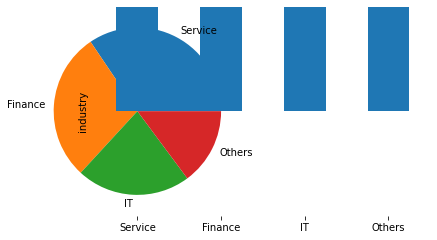

In [44]:
%matplotlib inline
data['industry'].value_counts().plot(kind="pie") # 파이플롯
data['industry'].value_counts().plot(kind="bar") # 세로막대 플롯
data['industry'].value_counts().plot(kind="line") # 선 플롯(기본값)

#### 4. 연속형(numeric/continuos) 자료형 탐색  
__4.1__ 데이터세트명.__describe()__ : 기술통계량을 이용하여 모든 변수별 요약 통계량을 반환   

In [8]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


count: 209개의 행  
__mean__ : 평균  
std : 표준편차  
min : 최소값  
25% : IQR 1분위수  
__50%__ : IOR 2분위수 (median)  
75% : IOR 3분위수  
max : 최대값  
 
__평균과 중위수__의 차이가 작을수록 __이상치__가 __적은__ 데이터입니다.

__4.2__ 데이터세트명.__skew()__ : 왜도(skewness) 반환

In [9]:
data.skew()

/var/folders/8k/qkyjfwv90l1dk_038ty806ym0000gn/T/ipykernel_1426/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

__4.3__ 데이터세트명.__kurtosis()__: 첨도 반환

In [10]:
data.kurtosis()

/var/folders/8k/qkyjfwv90l1dk_038ty806ym0000gn/T/ipykernel_1426/2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

__4.4__ __.hist()__ 히스토그램으로 한 번에 확인할 수 있음

<AxesSubplot:>

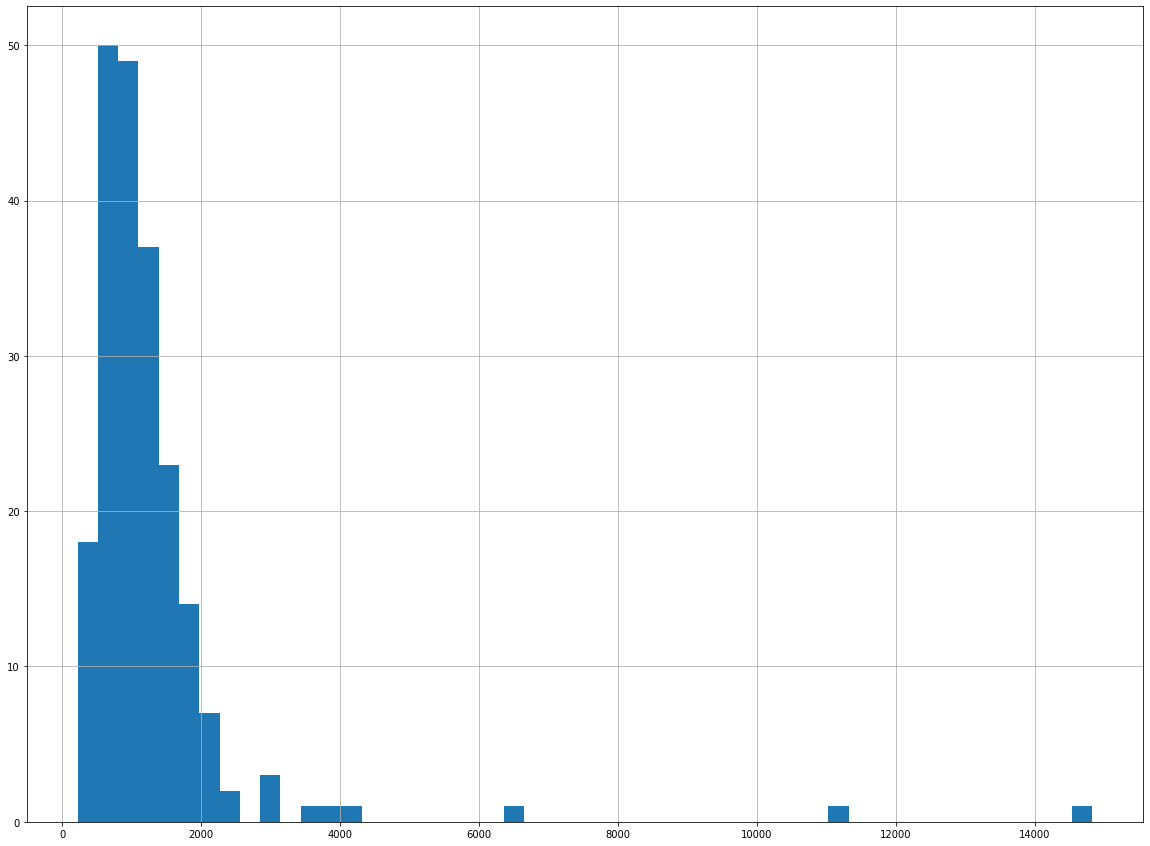

In [11]:
import matplotlib.pyplot as plt
data['salary'].hist(bins=50, figsize=(20,15))

역시나 왼쪽에 큰 값이 존재합니다.